<h1>Sales and ESRB Ratings Data Analysis</h1>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games_df = pd.read_csv('../data/normalized_games_data.csv')

<h2>1. Is there a relationship between ESRB ratings and sales? Does one outsell the other?</h2>

The number of games we are analyzing for this question: 4357


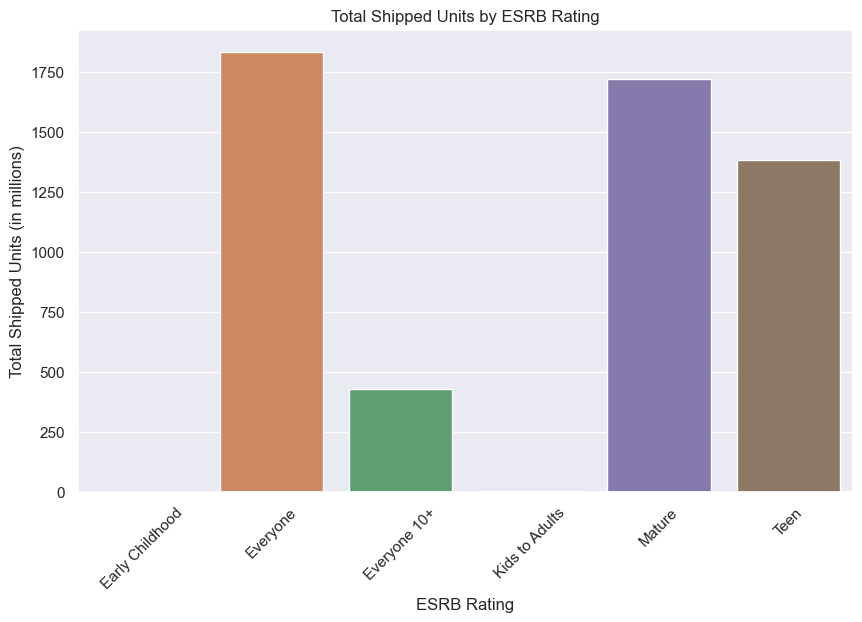

In [75]:
sales_esrb_rating_full_df = games_df[['esrb_rating_full', 'total_shipped']]

# Drop rows with NaN values
sales_esrb_rating_full_df = sales_esrb_rating_full_df.dropna()

esrb_rating_group_df = sales_esrb_rating_full_df.groupby('esrb_rating_full').sum().reset_index().rename(columns={'total_shipped': 'sales_in_millions'})

print(f'The number of games we are analyzing for this question: {len(sales_esrb_rating_full_df)}')

plt.figure(figsize=(10, 6))
sns.barplot(x=esrb_rating_group_df['esrb_rating_full'], y=esrb_rating_group_df['sales_in_millions'], errorbar=None)
plt.title('Total Shipped Units by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.xticks(rotation=45)
plt.ylabel('Total Shipped Units (in millions)')
plt.show()

The number of mature games: 813
The number of adult only games: 0
The number of everyone games: 1420
The number of everyone 10+ games: 516
The number of teen games: 1604
The number of kids to adults games: 3
The number of early childhood games: 1


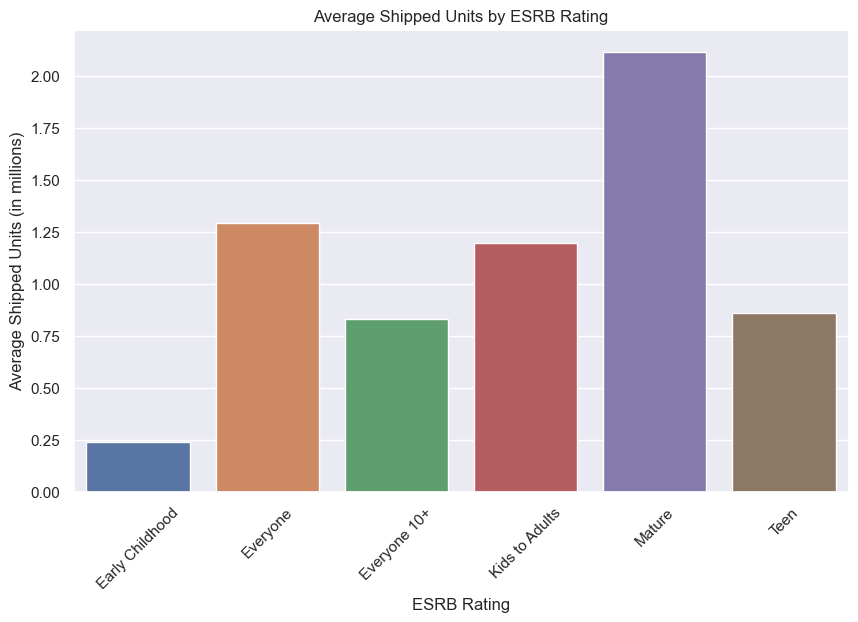

In [76]:
mature_games_df = games_df[games_df['esrb_rating'] == 'M']
adult_only_games_df = games_df[games_df['esrb_rating'] == 'AO']
everyone_games_df = games_df[games_df['esrb_rating'] == 'E']
everyone_10_games_df = games_df[games_df['esrb_rating'] == 'E10+']
teen_games_df = games_df[games_df['esrb_rating'] == 'T']
kids_to_adults_games_df = games_df[games_df['esrb_rating'] == 'K-A']
early_childhood_games_df = games_df[games_df['esrb_rating'] == 'EC']

print(f'The number of mature games: {len(mature_games_df)}')
print(f'The number of adult only games: {len(adult_only_games_df)}')
print(f'The number of everyone games: {len(everyone_games_df)}')
print(f'The number of everyone 10+ games: {len(everyone_10_games_df)}')
print(f'The number of teen games: {len(teen_games_df)}')
print(f'The number of kids to adults games: {len(kids_to_adults_games_df)}')
print(f'The number of early childhood games: {len(early_childhood_games_df)}')

# Determining which ESRB rating has the highest average sales
esrb_rating_by_sales_df = sales_esrb_rating_full_df.groupby('esrb_rating_full').mean().reset_index().rename(columns={'total_shipped': 'sales_in_millions'})

plt.figure(figsize=(10, 6))
sns.barplot(x=esrb_rating_by_sales_df['esrb_rating_full'], y=esrb_rating_by_sales_df['sales_in_millions'], errorbar=None)
plt.title('Average Shipped Units by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.xticks(rotation=45)
plt.ylabel('Average Shipped Units (in millions)')
plt.show()

<p>There were virtually no games (at least in this dataset) where the ESRB ratings were AO, KA, or EC with games over 100,000 sold units. This would explain the near 0 in sales.</p>

<p>Another interesting thing to note is that there is not a wide difference in sales between E, T, and M.  E10+ is the only rating that has a significant difference in sales compared to the other three. This is not due to a small volume of games with this rating (516) since M-rated games are not that much more in number (813)</p>

<p>Mature games tend to have the best sales numbers by unit. This is probably due to the fact that older games tend to have more disposable income and are more likely to purchase games. This is also probably due to the fact that younger gamers are more likely to play games on their phones or tablets, which are not included in this dataset.</p>

<h3>2. How many games are there by genre?</h3>

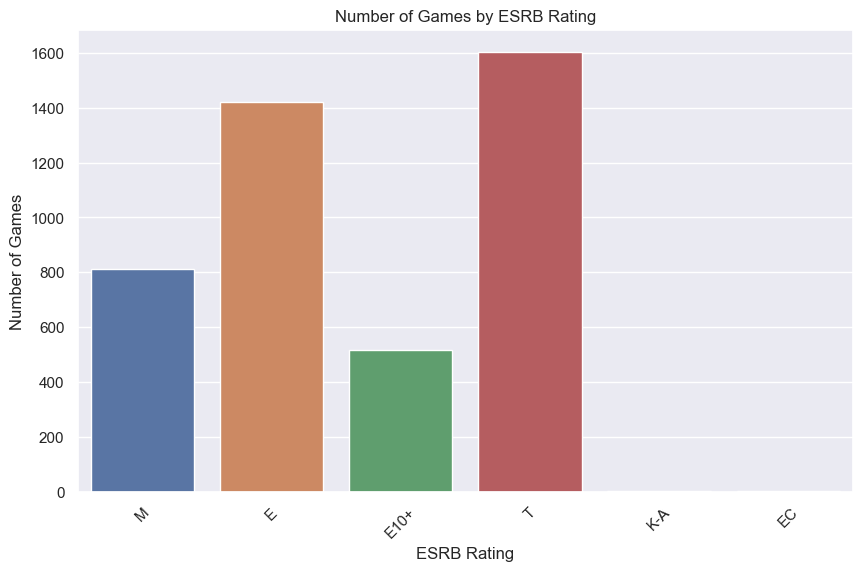

In [77]:
# Group the volumes of games by ESRB rating into one dataframe
esrb_rating_volumes_df = pd.DataFrame({
    'esrb_rating': ['M', 'E', 'E10+', 'T', 'K-A', 'EC'],
    'volume': [len(mature_games_df), len(everyone_games_df), len(everyone_10_games_df), len(teen_games_df), len(kids_to_adults_games_df), len(early_childhood_games_df)]
})

plt.figure(figsize=(10, 6))
sns.barplot(x=esrb_rating_volumes_df['esrb_rating'], y=esrb_rating_volumes_df['volume'], errorbar=None)
plt.title('Number of Games by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.xticks(rotation=45)
plt.ylabel('Number of Games')
plt.show()